In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [81]:
df_train = pd.read_csv('application_train.csv')

In [82]:
X_test = pd.read_csv('application_test.csv')
X_test_ids = X_test.iloc[:, 0]

### Run this cell for mem checks

In [83]:
X = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [84]:
X = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')

### Testing section

In [85]:
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

Let's write our own cross validation loop so we train only on a small portion of the data.  We'll validate on a much larger set than we train on.

In [86]:
# pipe = XGBClassifier(n_estimators=30000, n_jobs=-1)

In [87]:
# cv_scores = []
# for tr_ind, val_ind in kf.split(X,y):
    
#     eval_set=[(X.iloc[tr_ind],y.iloc[tr_ind]),(X.iloc[val_ind],y.iloc[val_ind])]
#     fit_model = pipe.fit(
#                     X.iloc[tr_ind], y.iloc[tr_ind], 
#                     eval_set=eval_set,
#                     eval_metric='auc',
#                     early_stopping_rounds=50,
#                     verbose=True #gives output log as below
#                    )
    
#     cv_scores.append(pipe.best_ntree_limit)

# print(cv_scores)
# print('avg optimal n estimators: {}'.format(np.mean(cv_scores)))

In [88]:
#best n_estimators=671

# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

# depths = [3,5,7,9]

# depth_scores = []
# for d in depths:
#     cv_scores = []
#     for tr_ind, val_ind in kf.split(X,y):
#         pipe = XGBClassifier(n_estimators=100, n_jobs=-1, learning_rate=.1,
#                       subsample=1,
#                       min_child_weight=1,
#                       colsample_bytree=.8, max_depth=d)
#         #eval_set=[(X.iloc[tr_ind],y.iloc[tr_ind]),(X.iloc[val_ind],y.iloc[val_ind])]
#         fit_model = pipe.fit(
#                         X.iloc[tr_ind], y.iloc[tr_ind], 
#                         #eval_set=eval_set,
#                         #eval_metric='auc',
#                         #early_stopping_rounds=50,
#                         #verbose=True #gives output log as below
#                        )

#         cv_scores.append(roc_auc_score(y.iloc[val_ind], fit_model.predict_proba(X.iloc[val_ind][:, 1])))
#     depth_scores.append(np.mean(cv_scores))

# print(depth_scores)

In [89]:
# y_pred = pipe.predict_proba(X_test)

In [90]:
# pd.concat([X_test_ids, pd.DataFrame(y_pred[:, 1])], axis=1).rename(columns={0:'TARGET'}).to_csv('submission.csv', index=False)

In [6]:
with open('xgb_model.pkl', 'rb') as f:
    pipe= pickle.load(f)

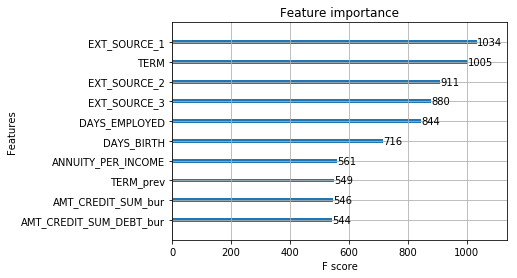

In [7]:
plot_importance(pipe, max_num_features=10)

In [70]:
X.NAME_CONTRACT_STATUS_Refused_prev

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'TERM', 'DAYS_EMPLOYED',
       'AVG_AMT_SHORT_install', 'AMT_PAYMENT_install',
       'CNT_DRAWINGS_ATM_CURRENT_AVG_cc', 'NAME_CONTRACT_STATUS_Refused_prev',
       'DAYS_BIRTH', 'CNT_INSTALMENT_MAX_pos', 'CODE_GENDER_M',
       'INSTALMENTS_REMAINING_pos', 'AMT_CREDIT_SUM_bur',
       'AMT_DOWN_PAYMENT_prev', 'AMT_ANNUITY', 'TERM_prev',
       'SK_DPD_DEF_AVG_pos', 'MONTHS_BALANCE_MIN_pos', 'AMT_GOODS_PRICE',
       'NAME_EDUCATION_TYPE_Higher education', 'CREDIT_TYPE_Microloan_bur',
       'OWN_CAR_AGE', 'DAYS_LATE_PAYMENT_install', 'DAYS_CREDIT_ENDDATE_bur',
       'ANNUITY_PER_INCOME', 'DAYS_LAST_DUE_1ST_VERSION_prev',
       'NAME_YIELD_GROUP_high_prev', 'AMT_CREDIT_SUM_DEBT_bur',
       'FLAG_DOCUMENT_3', 'MISSED_PAYMENTS_install',
       'PERCENT_DRAW_ATM_LIMIT_cc', 'AMT_CREDIT_MAX_OVERDUE_bur',
       'CREDIT_ACTIVE_Active_bur', 'AMT_CREDIT', 'PERCENT_DRAW_LIMIT_cc',
       'MONTHS_BALANCE_MAX_pos', 'CONSUMER', 'DAYS_FIRST

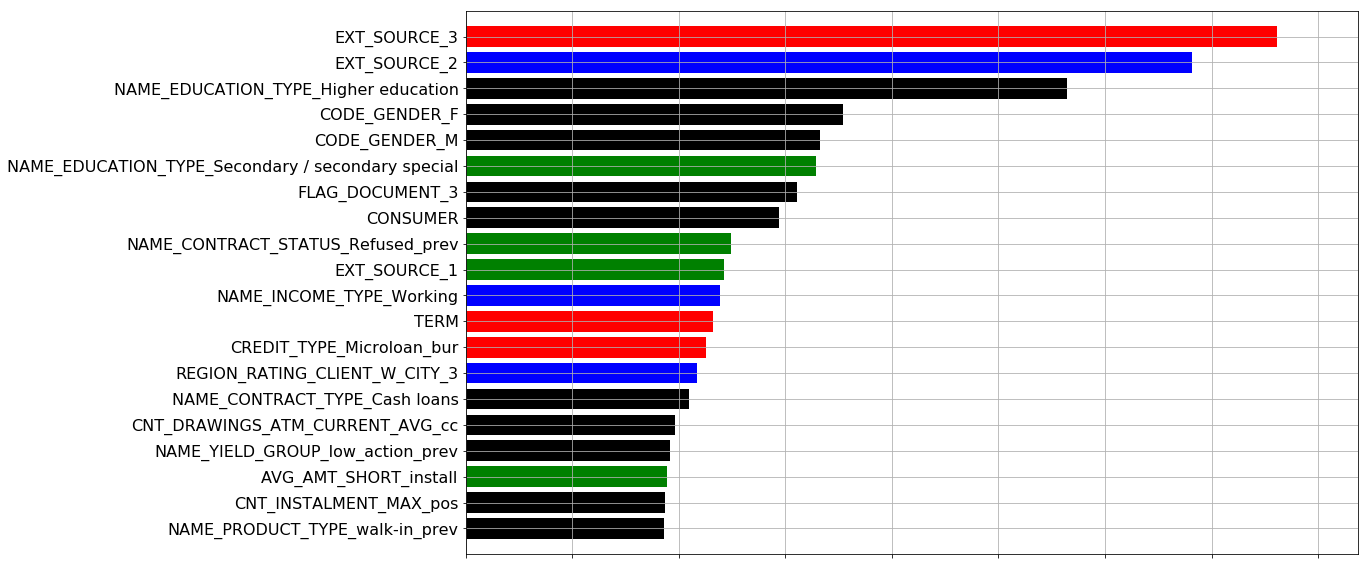

In [71]:
ax = plot_importance(pipe, title=None, max_num_features=20, xlabel=None, ylabel=None, importance_type='gain', show_values=False, height=.8, color='kkgkkkbrrbgg')
fig = plt.gcf()
fig.set_size_inches(16,10)
ax.set_xticklabels([])
plt.yticks(fontsize=16)
# plt.title('Top 12 Feature Importances', fontsize=40)
plt.savefig('featimp12.png',bbox_inches="tight")

In [41]:
def plotROC(model, X_test, y_test, c='k', l=''):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, c=c, label = 'AUC ' + l + ' = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [17]:
pipe1 = XGBClassifier(n_estimators=586, n_jobs=-1, learning_rate=.05,
              subsample=1,
              min_child_weight=4,
              colsample_bytree=.8, max_depth=6, gamma=.05, random_state=45)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=.2)
pipe1.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=4, missing=None,
       n_estimators=586, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=45, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

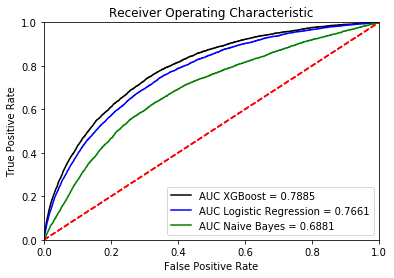

In [44]:
plotROC(pipe1, X_te, y_te, c='k', l='XGBoost')
plotROC(logit, X_te, y_te, c='b', l='Logistic Regression')
plotROC(nb, X_te, y_te, c='g', l='Naive Bayes')
plt.savefig('AUC_comparison.png')

In [21]:
nb = make_pipeline(Imputer(), StandardScaler(), GaussianNB())
nb.fit(X_tr, y_tr)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [26]:
logit = make_pipeline(Imputer(), StandardScaler(), LogisticRegression())
logit.fit(X_tr, y_tr)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

ValueError: Unable to parse node: 48:[PRODUCT_COMBINATION_Cash

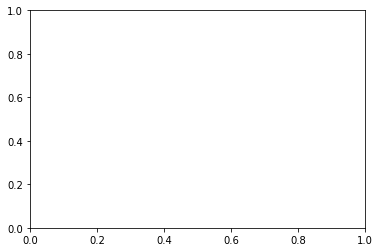

In [17]:
xgboost.to_graphviz(pipe.get_booster())

ValueError: Unable to parse node: 48:[PRODUCT_COMBINATION_Cash

In [69]:
X.shape

(307511, 92)